# EDA

In [47]:
# Import libraries
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
# Load the data into a dataframe
nba = pd.read_csv('nba_games.csv')

In [4]:
# Get info about the data 
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24359 entries, 0 to 24358
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        24359 non-null  object 
 1   year_id        24359 non-null  int64  
 2   fran_id        24359 non-null  object 
 3   opp_fran       24359 non-null  object 
 4   game_location  24359 non-null  object 
 5   is_playoffs    24359 non-null  int64  
 6   pts            24359 non-null  int64  
 7   opp_pts        24359 non-null  int64  
 8   game_result    24359 non-null  object 
 9   forecast       24359 non-null  float64
 10  point_diff     24359 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


In [21]:
# Get more info
nba.describe()

,year_id,is_playoffs,pts,opp_pts,forecast,point_diff
count,24359.000000,24359.000000,24359.000000,24359.000000,24359.000000,24359.000000
mean,1986.916581,0.077754,103.384663,102.438154,0.527805,0.946508
std,17.427172,0.267789,14.724792,14.812181,0.213054,13.341020
min,1947.000000,0.000000,43.000000,38.000000,0.024271,-62.000000
25%,1974.000000,0.000000,94.000000,93.000000,0.359191,-8.000000
50%,1988.000000,0.000000,103.000000,102.000000,0.533177,2.000000
75%,2002.000000,0.000000,113.000000,112.000000,0.698763,10.000000
max,2015.000000,1.000000,173.000000,176.000000,0.976221,56.000000


In [50]:
# Show the first five rows of nba
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [51]:
# No missing data was detected
nba.isna().sum()

game_id          0
year_id          0
fran_id          0
opp_fran         0
game_location    0
is_playoffs      0
pts              0
opp_pts          0
game_result      0
forecast         0
point_diff       0
dtype: int64

In [28]:
# Subset Data from 2010 Season and 2014
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

In [29]:
# Show the first five rows of nba_2010
nba_2010.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
21717,200910270CLE,2010,Celtics,Cavaliers,A,0,95,89,W,0.277472,6
21718,200910280BOS,2010,Celtics,Hornets,H,0,92,59,W,0.814619,33
21719,200910280MIA,2010,Knicks,Heat,A,0,93,115,L,0.258755,-22
21720,200910280MIN,2010,Nets,Timberwolves,A,0,93,95,L,0.475155,-2
21721,200910280OKC,2010,Thunder,Kings,H,0,102,89,W,0.716764,13


In [30]:
# Show the first five rows of the nba_2014
nba_2014.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
23468,201310300CLE,2014,Nets,Cavaliers,A,0,94,98,L,0.611981,-4
23469,201310300NYK,2014,Knicks,Bucks,H,0,90,83,W,0.793150,7
23470,201310300SAS,2014,Spurs,Grizzlies,H,0,101,94,W,0.692980,7
23471,201310300TOR,2014,Celtics,Raptors,A,0,87,93,L,0.361233,-6
23472,201310300UTA,2014,Thunder,Jazz,A,0,101,98,W,0.526056,3


In [35]:
# Get knicks points from nba_2010
Knicks_pts_2010 = nba_2010[nba_2010.fran_id == 'Knicks']['pts']

In [36]:
# Get Nets points from nba_2010
Nets_pts_2010 = nba_2010[nba_2010.fran_id == 'Nets']['pts']

In [40]:
# Calculate the difference between the two teams’ average points scored in 2010
diff_means_2010 = Knicks_pts_2010.mean() - Nets_pts_2010.mean()
diff_means_2010

9.731707317073173

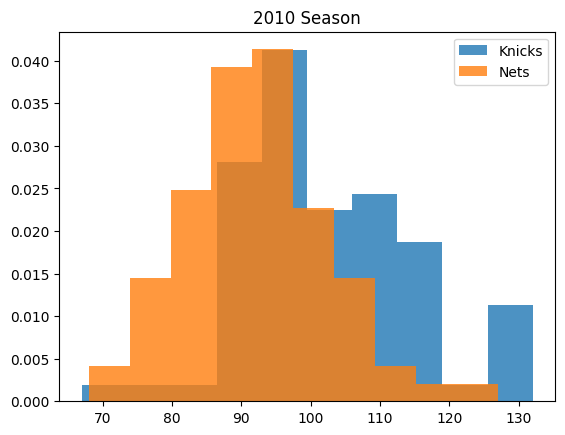

<Figure size 640x480 with 0 Axes>

In [42]:
# Create a set of overlapping histograms for the Knicks compared to the Nets from the year 2010
plt.hist(Knicks_pts_2010, alpha=0.8, density=True, label='Knicks')
plt.hist(Nets_pts_2010, alpha=0.8, density=True, label='Nets')
plt.legend()
plt.title('2010 Season')
plt.savefig('season2010.png')
plt.show()
plt.clf()

In [43]:
# Get knicks points from nba_2014
Knicks_pts_2014 = nba_2014[nba_2014.fran_id == 'Knicks']['pts']

In [44]:
# Get Nets points from nba_2014
Nets_pts_2014 = nba_2014[nba_2014.fran_id == 'Nets']['pts']

In [45]:
# Calculate the difference between the two teams’ 2014 average points scored in 2014
diff_means_2014 = Knicks_pts_2014.mean() - Nets_pts_2014.mean()
diff_means_2014

0.44706798131809933

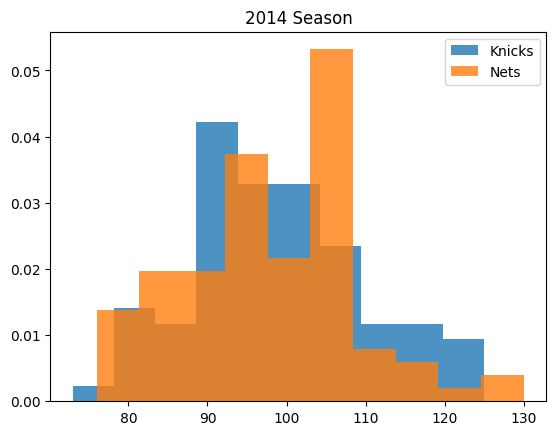

<Figure size 640x480 with 0 Axes>

In [46]:
# Create a set of overlapping histograms for the Knicks compared to the Nets from the year 2014
plt.hist(Knicks_pts_2014, alpha = .8, density = True, label = 'Knicks')
plt.hist(Nets_pts_2014, alpha = .8, density = True, label = 'Nets')
plt.legend()
plt.title('2014 Season')
plt.savefig('season2014.png')
plt.show()
plt.clf()